In [69]:
import openmc
%matplotlib inline

In [70]:
#materials

#Uranium 4% Enrichment 
uranium_40 = openmc.Material(name='enrich4.0')
uranium_40.add_element('U', 1.0, enrichment=4.0)
uranium_40.add_element('O', 2.0)
uranium_40.set_density('g/cc', 10.4)
#Uranium 3.3% Enrichment
uranium_33 = openmc.Material(name='enrich3.3')
uranium_33.add_element('U', 1.0, enrichment=3.3)
uranium_33.add_element('O', 2.0)
uranium_33.set_density('g/cc', 10.4)
#Uranium 3% Enrichment
uranium_30 = openmc.Material(name='enrich3.0')
uranium_30.add_element('U', 1.0, enrichment=3.0)
uranium_30.add_element('O', 2.0)
uranium_30.set_density('g/cc', 10.4)
#Uranium 2.2% Enrichment
uranium_22 = openmc.Material(name='enrich2.2')
uranium_22.add_element('U', 1.0, enrichment=2.2)
uranium_22.add_element('O', 2.0)
uranium_22.set_density('g/cc', 10.4)
#Uranium 1.3% Enrichment
uranium_13 = openmc.Material(name='enrich1.3')
uranium_13.add_element('U', 1.0, enrichment=1.3)
uranium_13.add_element('O', 2.0)
uranium_13.set_density('g/cc', 10.4)
#Depleted Uranium for Shielding
blanket_fuel_material = openmc.Material(name='blanket fuel')
blanket_fuel_material.add_element('U', 1.0, enrichment=0.3)
blanket_fuel_material.add_element('O', 2.0)
blanket_fuel_material.set_density('g/cc', 10.4)
blanket_fuel_material.volume = 100 # in cm3
#Guided Tube Material
Gd2O3 = openmc.Material()
Gd2O3.add_element('Gd', 2.0)
Gd2O3.add_element('O', 3.0)
Gd2O3.set_density('g/cm3', 7.41)
#MOX Fuel Materials
u235 = openmc.Material(name='U235')
u235.add_nuclide('U235', 1.0)
u235.set_density('g/cm3', 10.0)
u235.volume = 100

u238 = openmc.Material(name='U238')
u238.add_nuclide('U238', 1.0)
u238.set_density('g/cm3', 10.0)
u238.volume = 100

pu238 = openmc.Material(name='Pu238')
pu238.add_nuclide('Pu238', 1.0)
pu238.set_density('g/cm3', 10.0)
pu238.volume = 100

pu239 = openmc.Material(name='U235')
pu239.add_nuclide('Pu239', 1.0)
pu239.set_density('g/cm3', 10.0)
pu239.volume = 100

pu240 = openmc.Material(name='Pu240')
pu240.add_nuclide('Pu240', 1.0)
pu240.set_density('g/cm3', 10.0)
pu240.volume = 100

pu241 = openmc.Material(name='Pu241')
pu241.add_nuclide('Pu241', 1.0)
pu241.set_density('g/cm3', 10.0)
pu241.volume = 100

pu242 = openmc.Material(name='Pu242')
pu242.add_nuclide('Pu242', 1.0)
pu242.set_density('g/cm3', 10.0)
pu242.volume = 100

am241 = openmc.Material(name='Am241')
am241.add_nuclide('Am241', 1.0)
am241.set_density('g/cm3', 10.0)
am241.volume = 100

o16 = openmc.Material(name='O16')
o16.add_nuclide('O16', 1.0)
o16.set_density('g/cm3', 10.0)
o16.volume = 100
#Cladding Material
cladding_material = openmc.Material(name="stainless steel 316L")
cladding_material.add_element('Fe',0.66,'wo')
cladding_material.add_element('Cr', 0.17,'wo')
cladding_material.add_element('Ni', 0.12,'wo')
cladding_material.add_element('Mo',0.02,'wo')
cladding_material.add_element('Mn',0.02,'wo')
cladding_material.add_element('Si',0.01,'wo')
cladding_material.set_density('g/cm3',8.0)
#Coolant for LBEF fuel
fast_coolant_material = openmc.Material(name='lead Bismuth Eutectic')
fast_coolant_material.add_element('Pb', 0.999)
fast_coolant_material.add_element('Bi', 0.001)
fast_coolant_material.set_density('g/cm3', 10.24)
#Gap Material
gap_material = openmc.Material(name='helium')
gap_material.add_element('He', 1.0)
gap_material.set_density('g/cm3', 0.13)
#Graphite Material
graphite_material = openmc.Material(name='graphite')
graphite_material.set_density('g/cm3', 1.9)
graphite_material.add_element('C', 1.0)
graphite_material.add_s_alpha_beta('c_Graphite')
#Reflector Material
reflector_material = openmc.Material()
reflector_material.add_nuclide('Be9', 1.0)
reflector_material.add_nuclide('O16', 1.0)
reflector_material.set_density('g/cm3', 2.9)
#Control Rod Material
B10_4C = openmc.Material()
B10_4C.add_nuclide('B10', 4.0)
B10_4C.add_nuclide('C12', 1.0)
B10_4C.set_density('g/cm3', 2.52)

B11_4C = openmc.Material()
B11_4C.add_nuclide('B11', 4.0)
B11_4C.add_nuclide('C12', 1.0)
B11_4C.set_density('g/cm3', 2.52)

In [71]:
#mixtures
inner_mox_material = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0019, 0.7509, 0.0046, 0.0612, 0.0383, 0.0106, 0.0134, 0.001, 0.1181],
    'wo')
inner_mox_material.volume = 100
outer_mox_material = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0018, 0.73, 0.0053, 0.0711, 0.0445, 0.0124, 0.0156, 0.0017, 0.1176],
    'wo')
outer_mox_material.volume = 100

control_material = openmc.Material.mix_materials([B10_4C, B11_4C], [0.8, 0.2], 'wo')
materials_file = openmc.Materials([uranium_40, uranium_33, uranium_30, uranium_22, uranium_13, blanket_fuel_material, Gd2O3, u235,
u238, pu238, pu239, pu240, pu241, pu242, am241, o16, cladding_material, fast_coolant_material, gap_material, graphite_material, reflector_material, control_material,inner_mox_material,outer_mox_material])
materials_file.export_to_xml()

In [72]:
fast_coolant_cell = openmc.Cell(fill=fast_coolant_material)
lbe_coolant_universe = openmc.Universe(cells=(fast_coolant_cell,))

Reactor_size_top = openmc.ZPlane(z0=77.5, boundary_type = 'reflective')
Reactor_size_bottom = openmc.ZPlane(z0=-77.5, boundary_type = 'reflective')

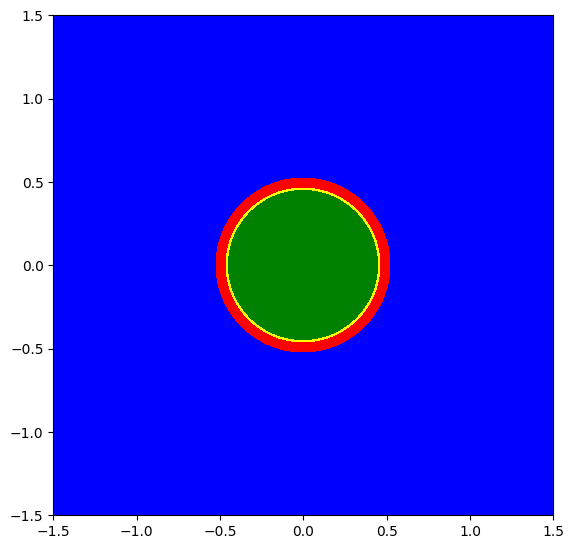

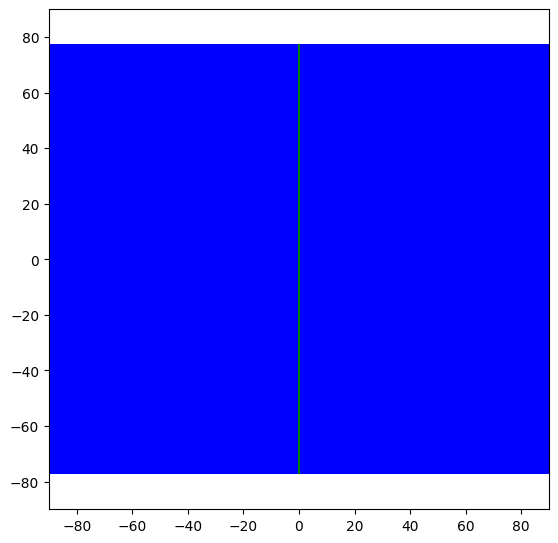

In [73]:
fuel_or = openmc.ZCylinder(r=0.450)
clad_ir = openmc.ZCylinder(r=0.465)
clad_or = openmc.ZCylinder(r=0.525)

fuel_region = -fuel_or & -Reactor_size_top & +Reactor_size_bottom
gap_region = +fuel_or & -clad_ir & -Reactor_size_top & +Reactor_size_bottom
clad_region = +clad_ir & -clad_or & -Reactor_size_top & +Reactor_size_bottom
coolant_region = +clad_or & -Reactor_size_top & +Reactor_size_bottom

fuel_cell_1 = openmc.Cell(fill=inner_mox_material, region=fuel_region)
clad_cell_1 = openmc.Cell(fill=cladding_material, region=clad_region)
gap_cell_1 = openmc.Cell(fill=gap_material, region=gap_region)
coolant_cell_1 = openmc.Cell(fill=fast_coolant_material, region=coolant_region)

inner_fuel_universe = openmc.Universe(cells=(fuel_cell_1, clad_cell_1, gap_cell_1, coolant_cell_1))
inner_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(3.0,3.0), color_by='material', colors={inner_mox_material:'green', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})
inner_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(180.0,180.0),basis='xz', color_by='material', colors={inner_mox_material:'green', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})


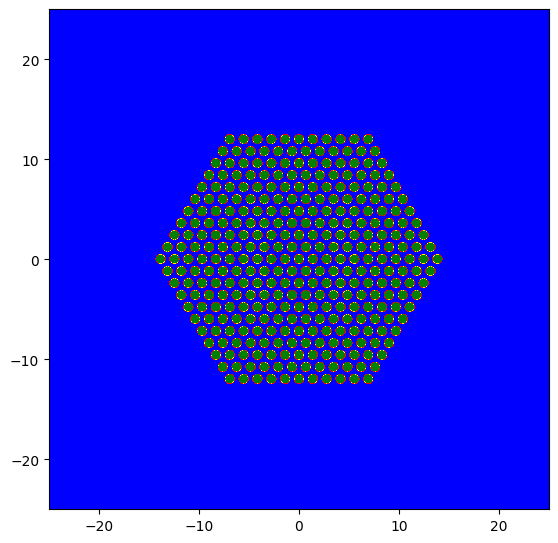

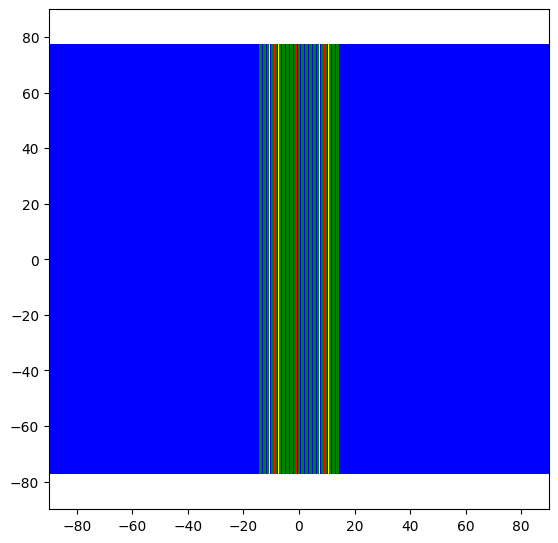

In [74]:
#assembly
ass_lat = openmc.HexLattice(name='fast assembly')
ass_lat.center = (0., 0.)
ass_lat.pitch = (1.384,)
ass_lat.orientation = 'x'
ass_lat.outer = lbe_coolant_universe

tc11 = [inner_fuel_universe]*60
tc10 = [inner_fuel_universe]*54
tc9 = [inner_fuel_universe]*48
tc8 = [inner_fuel_universe]*42
tc7 = [inner_fuel_universe]*36
tc6 = [inner_fuel_universe]*30
tc5 = [inner_fuel_universe]*24
tc4 = [inner_fuel_universe]*18
tc3 = [inner_fuel_universe]*12
tc2 = [inner_fuel_universe]*6
tc1 = [inner_fuel_universe]*1
ass_lat.universes = [tc11,tc10,tc9,tc8,tc7,tc6,tc5,tc4,tc3,tc2,tc1]

ass_boundary = openmc.model.hexagonal_prism(edge_length=20)

ass = openmc.Cell(fill=ass_lat, region=ass_boundary & -Reactor_size_top & +Reactor_size_bottom)
ass_out = openmc.Cell(fill=fast_coolant_material, region=~ass_boundary & -Reactor_size_top & +Reactor_size_bottom)

ass_u = openmc.Universe(cells=[ass,ass_out])

ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), color_by = 'material', colors={fast_coolant_material:'blue',inner_mox_material:'green', gap_material:'yellow', cladding_material:'red'})
ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (180,180), color_by = 'material', basis='xz', colors={fast_coolant_material:'blue', inner_mox_material:'green', gap_material:'yellow', cladding_material:'red'})

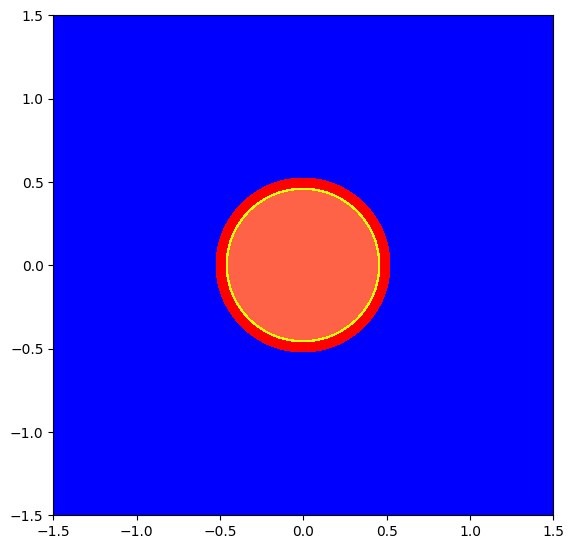

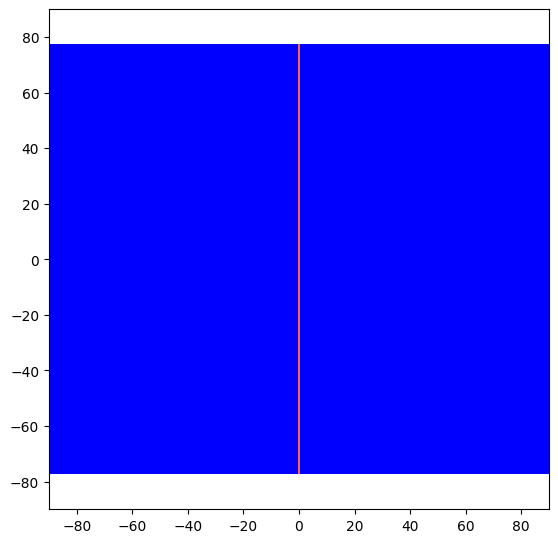

In [75]:
fuel_or = openmc.ZCylinder(r=0.450)
clad_ir = openmc.ZCylinder(r=0.465)
clad_or = openmc.ZCylinder(r=0.525)

fuel_region = -fuel_or & -Reactor_size_top & +Reactor_size_bottom
gap_region = +fuel_or & -clad_ir & -Reactor_size_top & +Reactor_size_bottom
clad_region = +clad_ir & -clad_or & -Reactor_size_top & +Reactor_size_bottom
coolant_region = +clad_or & -Reactor_size_top & +Reactor_size_bottom

fuel_cell_2 = openmc.Cell(fill=blanket_fuel_material, region=fuel_region)
clad_cell_2 = openmc.Cell(fill=cladding_material, region=clad_region)
gap_cell_2 = openmc.Cell(fill=gap_material, region=gap_region)
coolant_cell_2 = openmc.Cell(fill=fast_coolant_material, region=coolant_region)

blanket_fuel_universe = openmc.Universe(cells=(fuel_cell_2, clad_cell_2, gap_cell_2, coolant_cell_2))
blanket_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(3.0,3.0), color_by='material', colors={blanket_fuel_material:'tomato', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})
blanket_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(180.0,180.0),basis='xz', color_by='material', colors={blanket_fuel_material:'tomato', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})


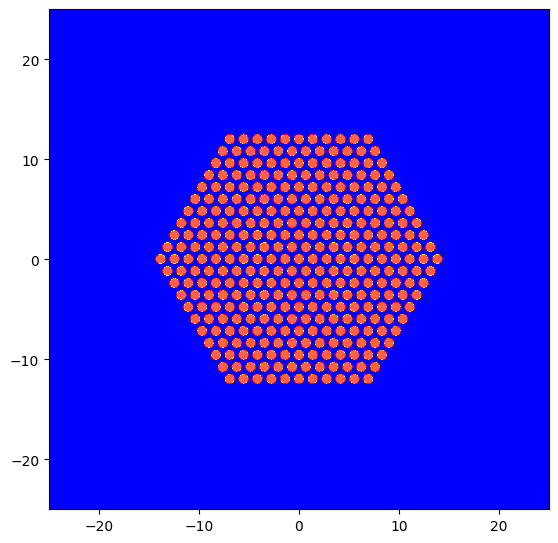

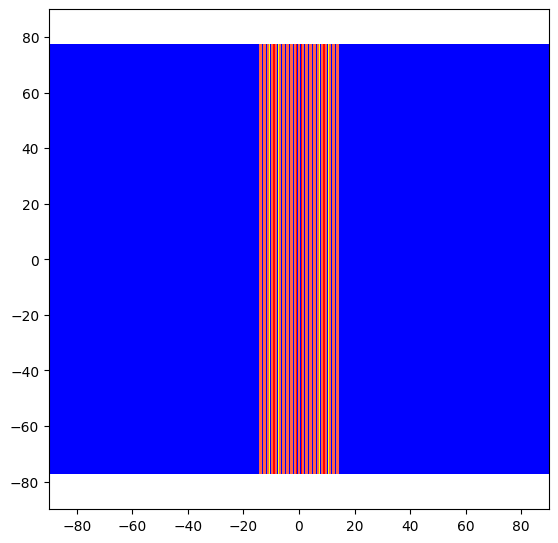

In [76]:
#assembly
blanket_ass_lat = openmc.HexLattice(name='fast assembly')
blanket_ass_lat.center = (0., 0.)
blanket_ass_lat.pitch = (1.384,)
blanket_ass_lat.orientation = 'x'
blanket_ass_lat.outer = lbe_coolant_universe

tc11 = [blanket_fuel_universe]*60
tc10 = [blanket_fuel_universe]*54
tc9 = [blanket_fuel_universe]*48
tc8 = [blanket_fuel_universe]*42
tc7 = [blanket_fuel_universe]*36
tc6 = [blanket_fuel_universe]*30
tc5 = [blanket_fuel_universe]*24
tc4 = [blanket_fuel_universe]*18
tc3 = [blanket_fuel_universe]*12
tc2 = [blanket_fuel_universe]*6
tc1 = [blanket_fuel_universe]*1
blanket_ass_lat.universes = [tc11,tc10,tc9,tc8,tc7,tc6,tc5,tc4,tc3,tc2,tc1]

blanket_ass_boundary = openmc.model.hexagonal_prism(edge_length=20)

blanket_ass = openmc.Cell(fill=blanket_ass_lat, region=blanket_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)
blanket_ass_out = openmc.Cell(fill=fast_coolant_material, region=~blanket_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)

blanket_ass_u = openmc.Universe(cells=[blanket_ass,blanket_ass_out])

blanket_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), color_by = 'material', colors={fast_coolant_material:'blue',blanket_fuel_material:'tomato', gap_material:'yellow', cladding_material:'red'})
blanket_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (180,180), color_by = 'material', basis='xz', colors={fast_coolant_material:'blue', blanket_fuel_material:'tomato', gap_material:'yellow', cladding_material:'red'})

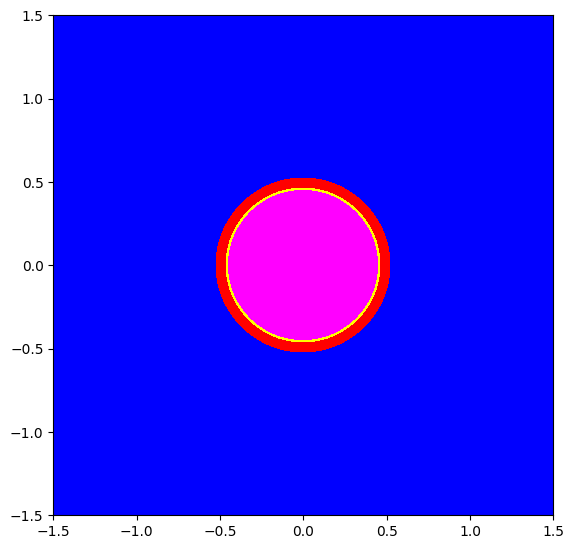

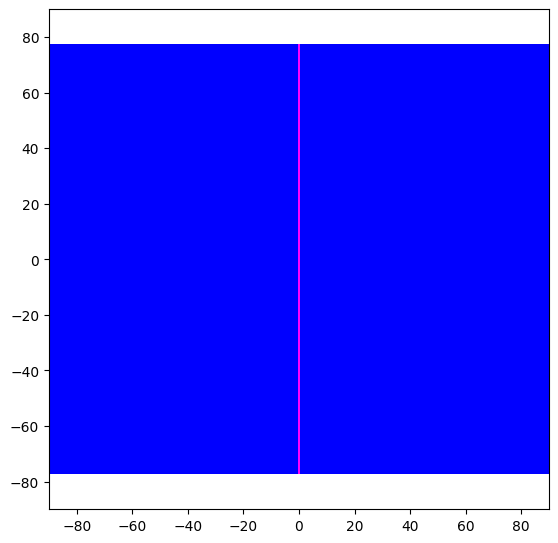

In [77]:
fuel_or = openmc.ZCylinder(r=0.450)
clad_ir = openmc.ZCylinder(r=0.465)
clad_or = openmc.ZCylinder(r=0.525)

fuel_region = -fuel_or & -Reactor_size_top & +Reactor_size_bottom
gap_region = +fuel_or & -clad_ir & -Reactor_size_top & +Reactor_size_bottom
clad_region = +clad_ir & -clad_or & -Reactor_size_top & +Reactor_size_bottom
coolant_region = +clad_or & -Reactor_size_top & +Reactor_size_bottom

fuel_cell_3 = openmc.Cell(fill=control_material, region=fuel_region)
clad_cell_3 = openmc.Cell(fill=cladding_material, region=clad_region)
gap_cell_3 = openmc.Cell(fill=gap_material, region=gap_region)
coolant_cell_3 = openmc.Cell(fill=fast_coolant_material, region=coolant_region)

control_rod_universe = openmc.Universe(cells=(fuel_cell_3, clad_cell_3, gap_cell_3, coolant_cell_3))
control_rod_universe.plot(origin=(0,0,0), pixels=(500,500), width=(3.0,3.0), color_by='material', colors={control_material:'magenta', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})
control_rod_universe.plot(origin=(0,0,0), pixels=(500,500), width=(180.0,180.0),basis='xz', color_by='material', colors={control_material:'magenta', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})

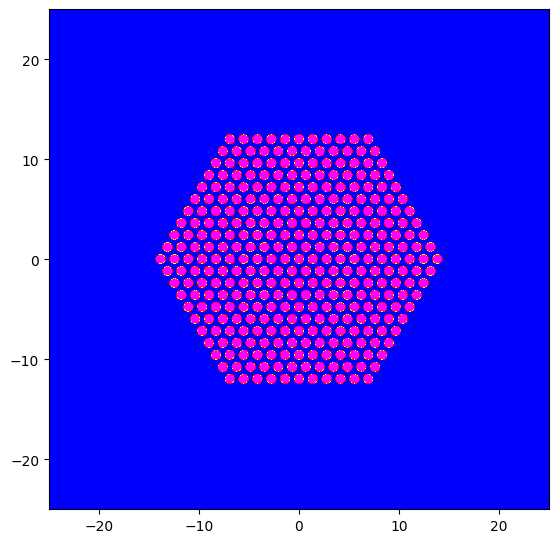

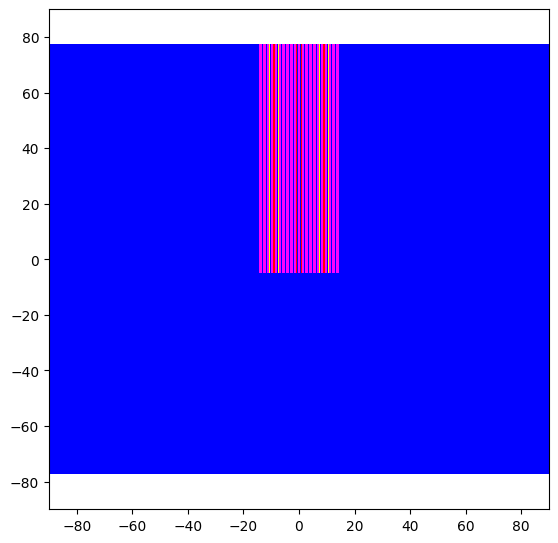

In [78]:
#assembly
control_ass_lat = openmc.HexLattice(name='fast assembly')
control_ass_lat.center = (0., 0.)
control_ass_lat.pitch = (1.384,)
control_ass_lat.orientation = 'x'
control_ass_lat.outer = lbe_coolant_universe

tc11 = [control_rod_universe]*60
tc10 = [control_rod_universe]*54
tc9 = [control_rod_universe]*48
tc8 = [control_rod_universe]*42
tc7 = [control_rod_universe]*36
tc6 = [control_rod_universe]*30
tc5 = [control_rod_universe]*24
tc4 = [control_rod_universe]*18
tc3 = [control_rod_universe]*12
tc2 = [control_rod_universe]*6
tc1 = [control_rod_universe]*1
control_ass_lat.universes = [tc11,tc10,tc9,tc8,tc7,tc6,tc5,tc4,tc3,tc2,tc1]

control_ass_boundary = openmc.model.hexagonal_prism(edge_length=20)

control_ass_barrier_bottom = openmc.ZPlane(z0=-5.0, boundary_type='vacuum')
control_ass_bottom_fill = openmc.Cell(fill=fast_coolant_material, region=control_ass_boundary & -control_ass_barrier_bottom & +Reactor_size_bottom)
control_ass = openmc.Cell(fill=control_ass_lat, region=control_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)
control_ass_out = openmc.Cell(fill=fast_coolant_material, region=~control_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)

control_ass_u = openmc.Universe(cells=[control_ass,control_ass_out, control_ass_bottom_fill])

control_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), color_by = 'material', colors={fast_coolant_material:'blue',control_material:'magenta', gap_material:'yellow', cladding_material:'red'})
control_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (180,180), color_by = 'material', basis='xz', colors={fast_coolant_material:'blue', control_material:'magenta', gap_material:'yellow', cladding_material:'red'})

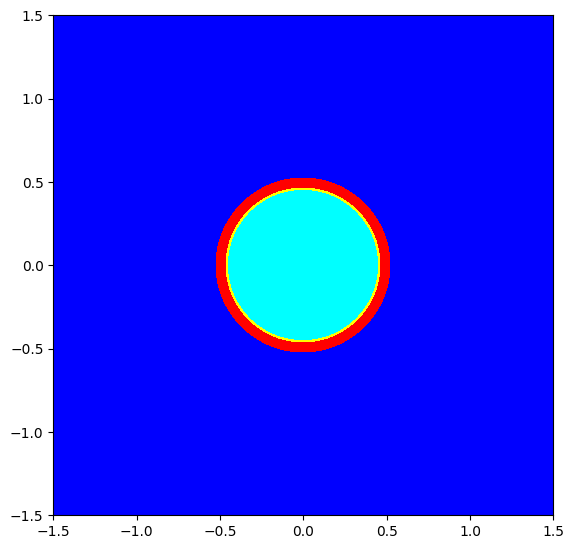

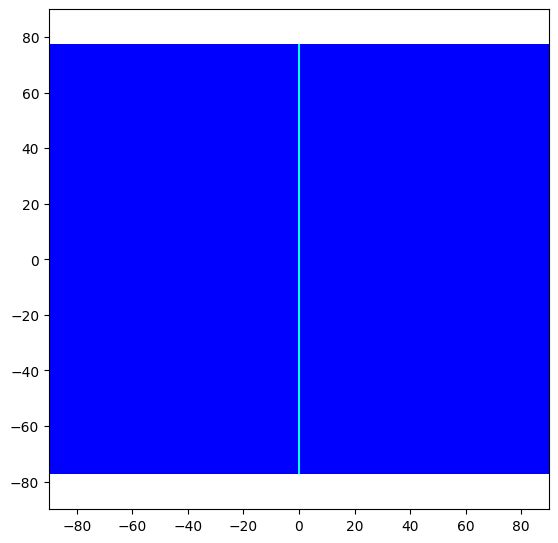

In [79]:
fuel_or = openmc.ZCylinder(r=0.450)
clad_ir = openmc.ZCylinder(r=0.465)
clad_or = openmc.ZCylinder(r=0.525)

fuel_region = -fuel_or & -Reactor_size_top & +Reactor_size_bottom
gap_region = +fuel_or & -clad_ir & -Reactor_size_top & +Reactor_size_bottom
clad_region = +clad_ir & -clad_or & -Reactor_size_top & +Reactor_size_bottom
coolant_region = +clad_or & -Reactor_size_top & +Reactor_size_bottom

fuel_cell_4 = openmc.Cell(fill=outer_mox_material, region=fuel_region)
clad_cell_4 = openmc.Cell(fill=cladding_material, region=clad_region)
gap_cell_4 = openmc.Cell(fill=gap_material, region=gap_region)
coolant_cell_4 = openmc.Cell(fill=fast_coolant_material, region=coolant_region)

outer_fuel_universe = openmc.Universe(cells=(fuel_cell_4, clad_cell_4, gap_cell_4, coolant_cell_4))
outer_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(3.0,3.0), color_by='material', colors={outer_mox_material:'cyan', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})
outer_fuel_universe.plot(origin=(0,0,0), pixels=(500,500), width=(180.0,180.0),basis='xz', color_by='material', colors={outer_mox_material:'cyan', gap_material:'yellow', cladding_material:'red', fast_coolant_material:'blue'})

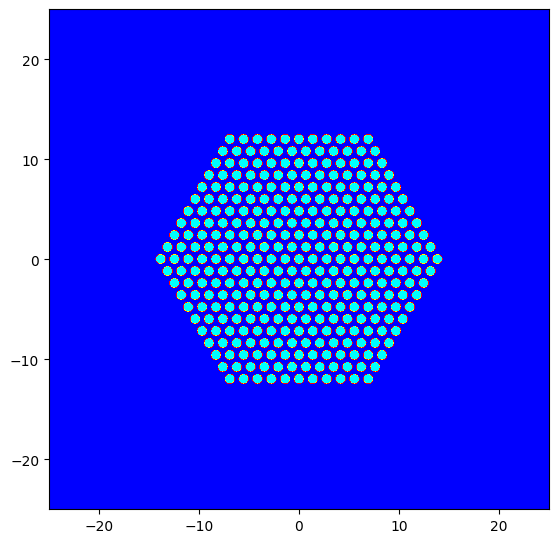

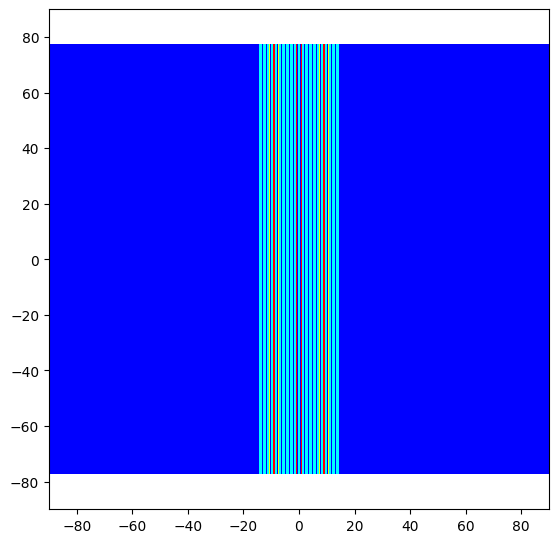

In [80]:
#assembly
outer_fuel_ass_lat = openmc.HexLattice(name='fast assembly')
outer_fuel_ass_lat.center = (0., 0.)
outer_fuel_ass_lat.pitch = (1.384,)
outer_fuel_ass_lat.orientation = 'x'
outer_fuel_ass_lat.outer = lbe_coolant_universe

tc11 = [outer_fuel_universe]*60
tc10 = [outer_fuel_universe]*54
tc9 = [outer_fuel_universe]*48
tc8 = [outer_fuel_universe]*42
tc7 = [outer_fuel_universe]*36
tc6 = [outer_fuel_universe]*30
tc5 = [outer_fuel_universe]*24
tc4 = [outer_fuel_universe]*18
tc3 = [outer_fuel_universe]*12
tc2 = [outer_fuel_universe]*6
tc1 = [outer_fuel_universe]*1
outer_fuel_ass_lat.universes = [tc11,tc10,tc9,tc8,tc7,tc6,tc5,tc4,tc3,tc2,tc1]

outer_fuel_ass_boundary = openmc.model.hexagonal_prism(edge_length=20)

outer_fuel_ass = openmc.Cell(fill=outer_fuel_ass_lat, region=outer_fuel_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)
outer_fuel_ass_out = openmc.Cell(fill=fast_coolant_material, region=~outer_fuel_ass_boundary & -Reactor_size_top & +Reactor_size_bottom)

outer_fuel_ass_u = openmc.Universe(cells=[outer_fuel_ass,outer_fuel_ass_out])

outer_fuel_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), color_by = 'material', colors={fast_coolant_material:'blue',outer_mox_material:'cyan', gap_material:'yellow', cladding_material:'red'})
outer_fuel_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (180,180), color_by = 'material', basis='xz', colors={fast_coolant_material:'blue', outer_mox_material:'cyan', gap_material:'yellow', cladding_material:'red'})

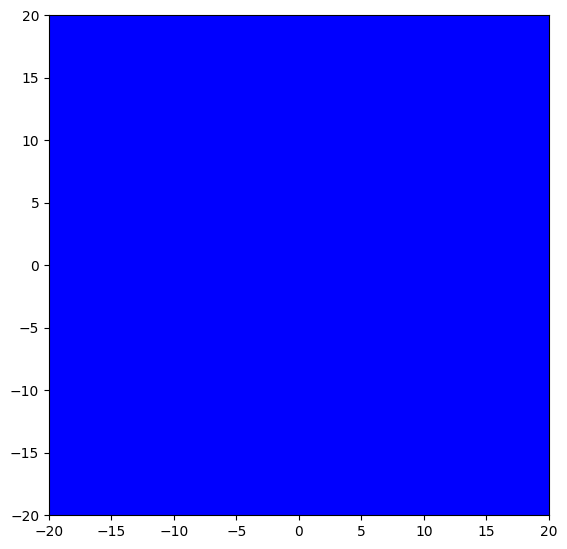

In [81]:
reactor = openmc.hexagonal_prism(edge_length=7*1.384, orientation='x')
reactor_surface = openmc.Cell(fill=fast_coolant_material, region= reactor & +Reactor_size_bottom & -Reactor_size_top)
reactor_surface_out = openmc.Cell(fill=fast_coolant_material, region= ~reactor & +Reactor_size_bottom & -Reactor_size_top)
reactor_universe = openmc.Universe(cells=[reactor_surface, reactor_surface_out])
reactor_universe.plot(origin=(0,0,0), pixels=(500,500), width=(40,40), color_by='material', colors={fast_coolant_material:'blue'})

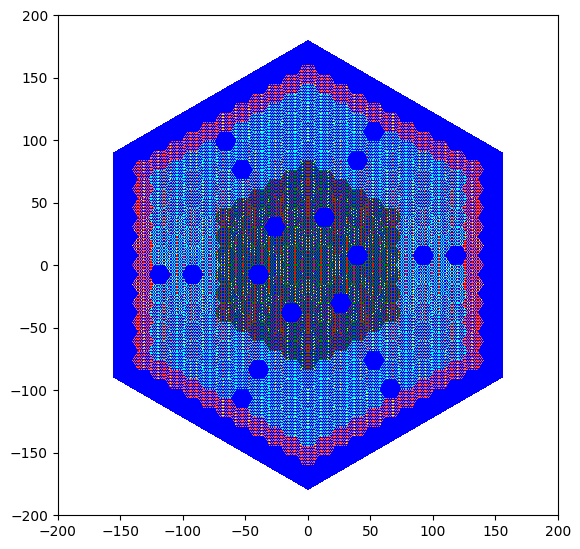

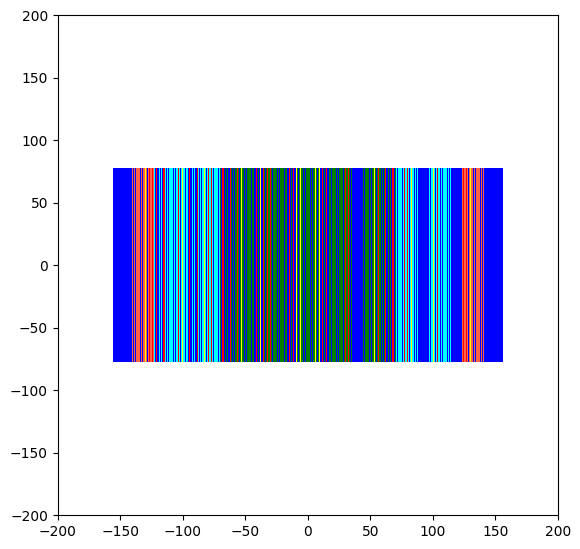

In [82]:
core_lattice_radial_zoning = openmc.HexLattice(name='core_radial_zoning')
core_lattice_radial_zoning.center = (0., 0)
core_lattice_radial_zoning.pitch = (11*1.384, )
core_lattice_radial_zoning.outer = lbe_coolant_universe
core_lattice_radial_zoning.orientation = 'y'

outer_ring = [blanket_ass_u]*60
ring_9 = [outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, reactor_universe, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u]*6
ring_8 = [outer_fuel_ass_u]*48
ring_7 = [outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, reactor_universe, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u]*6
ring_6 = [outer_fuel_ass_u]*36
ring_5 = [ass_u]*30
ring_4 = [ass_u]*24
ring_3 = [ass_u, reactor_universe, ass_u]*6
ring_2 = [ass_u]*12
ring_1 = [ass_u]*6
inner_ring = [ass_u]

core_lattice_radial_zoning.universes = [outer_ring, ring_9, ring_8, ring_7, ring_6, ring_5, ring_4, ring_3, ring_2, ring_1, inner_ring]
core_outer_out_surface = openmc.model.hexagonal_prism(edge_length=180, orientation='y', boundary_type='vacuum')
main_core_in_assembly = openmc.Cell(fill=core_lattice_radial_zoning, region=core_outer_out_surface & -Reactor_size_top & +Reactor_size_bottom)

main_core = openmc.Universe(cells=[main_core_in_assembly])
main_core.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})
main_core.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), basis='xz', color_by='material', colors={gap_material:'yellow', cladding_material:'red', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})

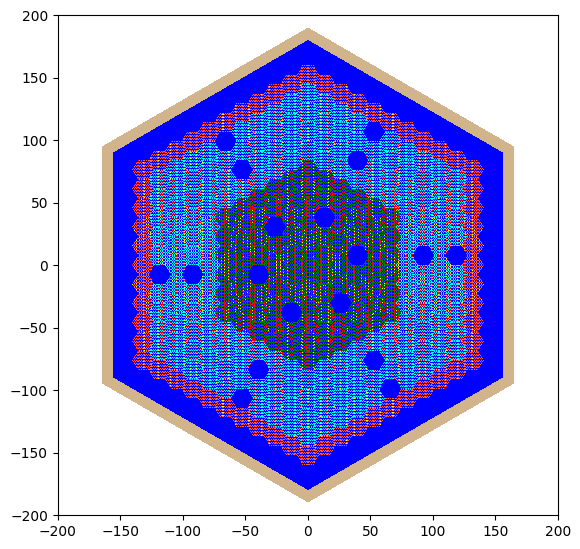

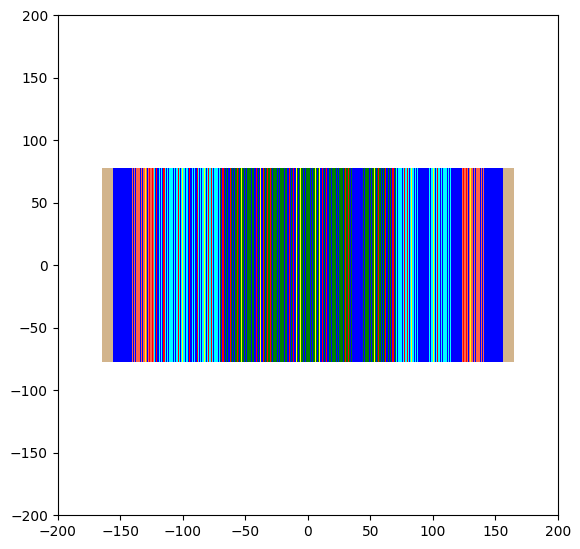

In [83]:
reflector_border_boundary = openmc.model.hexagonal_prism(edge_length=190)

reflector_border = openmc.Cell(fill=reflector_material, region=~core_outer_out_surface & reflector_border_boundary & -Reactor_size_top & +Reactor_size_bottom)

final_core = openmc.Universe(cells=[main_core_in_assembly, reflector_border])
final_core.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', reflector_material:'tan', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})
final_core.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', reflector_material:'tan', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'}, basis='xz')

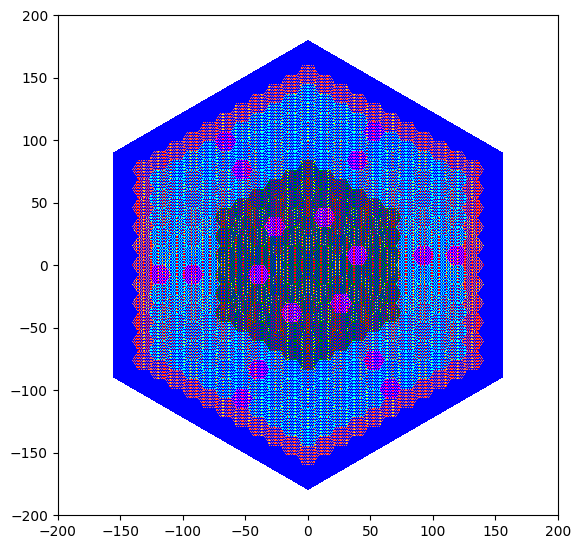

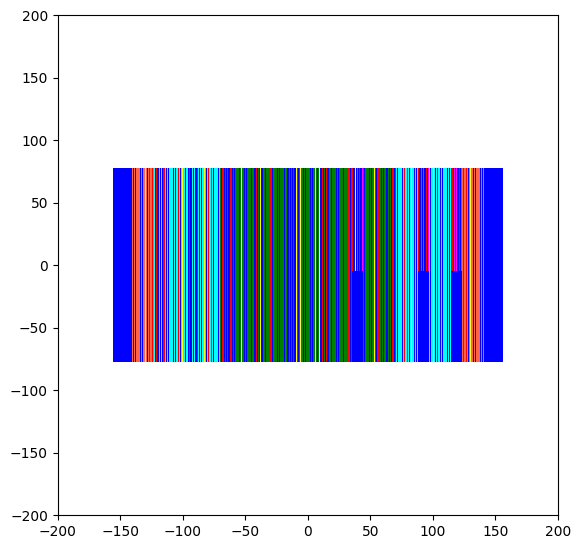

In [84]:
core_lattice_radial_zoning = openmc.HexLattice(name='core_radial_zoning')
core_lattice_radial_zoning.center = (0., 0)
core_lattice_radial_zoning.pitch = (11*1.384, )
core_lattice_radial_zoning.outer = lbe_coolant_universe
core_lattice_radial_zoning.orientation = 'y'

outer_ring = [blanket_ass_u]*60
ring_9 = [outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, control_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u]*6
ring_8 = [outer_fuel_ass_u]*48
ring_7 = [outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, control_ass_u, outer_fuel_ass_u, outer_fuel_ass_u, outer_fuel_ass_u]*6
ring_6 = [outer_fuel_ass_u]*36
ring_5 = [ass_u]*30
ring_4 = [ass_u]*24
ring_3 = [ass_u, control_ass_u, ass_u]*6
ring_2 = [ass_u]*12
ring_1 = [ass_u]*6
inner_ring = [ass_u]

core_lattice_radial_zoning.universes = [outer_ring, ring_9, ring_8, ring_7, ring_6, ring_5, ring_4, ring_3, ring_2, ring_1, inner_ring]
core_outer_out_surface = openmc.model.hexagonal_prism(edge_length=180, orientation='y', boundary_type='vacuum')
main_core_in_assembly = openmc.Cell(fill=core_lattice_radial_zoning, region=core_outer_out_surface & -Reactor_size_top & +Reactor_size_bottom)

main_core_cr = openmc.Universe(cells=[main_core_in_assembly])
main_core_cr.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})
main_core_cr.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), basis='xz', color_by='material', colors={gap_material:'yellow', cladding_material:'red', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})

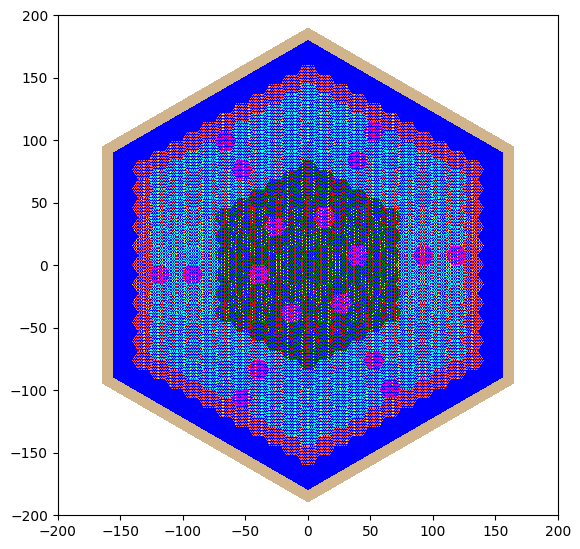

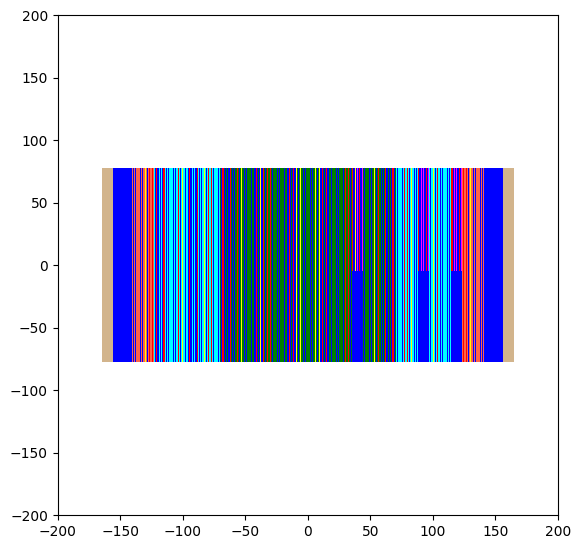

In [85]:
reflector_border_boundary = openmc.model.hexagonal_prism(edge_length=190)

reflector_border = openmc.Cell(fill=reflector_material, region=~core_outer_out_surface & reflector_border_boundary & -Reactor_size_top & +Reactor_size_bottom)

final_core_cr = openmc.Universe(cells=[main_core_in_assembly, reflector_border])
final_core_cr.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', reflector_material:'tan', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'})
final_core_cr.plot(origin=(0,0,0), pixels=(500,500), width=(400,400), color_by='material', colors={gap_material:'yellow', cladding_material:'red', reflector_material:'tan', control_material:'magenta', inner_mox_material:'green', outer_mox_material:'cyan', blanket_fuel_material:'tomato', fast_coolant_material:'blue'}, basis='xz')

In [86]:
materials_file.export_to_xml()
geometry = openmc.Geometry(final_core_cr)
geometry.export_to_xml()

batches = 10
inactive = 5
particles = 10000

# Instantiate a Settings object, set all runtime parameters, and export to XML
settings_file = openmc.Settings()
settings_file.temperature = {'method':'interpolation'}
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles
settings_file.energy_mode = 'continuous-energy'

# Create an initial uniform spatial source distribution over fissionable zones
bounds = [-150, -150, -50, 150, 150, 50]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
settings_file.source = openmc.Source(space=uniform_dist)



settings_file.export_to_xml()

In [87]:
openmc.run(output=False)

In [88]:
import openmc.deplete
chain = openmc.deplete.Chain.from_xml("./chain_endfb71_sfr.xml")
model = openmc.model.Model(settings=settings_file, geometry=geometry)
operator = openmc.deplete.CoupledOperator(model, "./chain_endfb71_sfr.xml")
power = 200
time_steps = [30*24*60*60]*6
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power)
integrator.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Na23 from /home/dresden/endfb-viii.0-hdf5/neutron/Na23.h5
 Reading Mg24 from /home/dresden/endfb-viii.0-hdf5/neutron/Mg24.h5
 Reading Mg25 from /home/dresden/endfb-viii.0-hdf5/neutron/Mg25.h5
 Reading Mg26 from /home/dresden/endfb-viii.0-hdf5/neutron/Mg26.h5
 Reading Al26_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Al26_m1.h5
 Reading Al27 from /home/dresden/endfb-viii.0-hdf5/neutron/Al27.h5
 Reading Si31 from /home/dresden/endfb-viii.0-hdf5/neutron/Si31.h5
 Reading Si32 from /home/dresden/endfb-viii.0-hdf5/neutron/Si32.h5
 Reading P31 from /home/dresden/endfb-viii.0-hdf5/neutron/P31.h5
 Reading S32 from /home/dresden/endfb-viii.0-hdf5/neutron/S32.h5
 Reading S33 from /home/dresden/endfb-viii.0-hdf5/neutron/S33.h5
 Reading S34 from /home/dresden/endfb-viii.0-hdf5/neutron/S34.h5
 Reading S35 from /home/dresden/endfb-viii.0-hdf5/neutron/S35.h5
 Reading S36 from /home/dresden/endfb-viii.0-hdf5/neutron/S36.h5
 Reading Cl35 from /home/dresden/endfb-viii.0-hdf5/neutron/Cl35.h5
 

 Reading Ar38 from /home/dresden/endfb-viii.0-hdf5/neutron/Ar38.h5
 Reading Ar39 from /home/dresden/endfb-viii.0-hdf5/neutron/Ar39.h5
 Reading Ar40 from /home/dresden/endfb-viii.0-hdf5/neutron/Ar40.h5
 Reading Ar41 from /home/dresden/endfb-viii.0-hdf5/neutron/Ar41.h5
 Reading K39 from /home/dresden/endfb-viii.0-hdf5/neutron/K39.h5
 Reading K40 from /home/dresden/endfb-viii.0-hdf5/neutron/K40.h5
 Reading K41 from /home/dresden/endfb-viii.0-hdf5/neutron/K41.h5
 Reading Ca40 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca40.h5
 Reading Ca41 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca41.h5
 Reading Ca42 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca42.h5
 Reading Ca43 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca43.h5
 Reading Ca44 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca44.h5
 Reading Ca45 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca45.h5
 Reading Ca46 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca46.h5
 Reading Ca47 from /home/dresden/endfb-viii.0-hdf5/neutron/Ca47.h5
 

 Reading Se80 from /home/dresden/endfb-viii.0-hdf5/neutron/Se80.h5
 Reading Se81 from /home/dresden/endfb-viii.0-hdf5/neutron/Se81.h5
 Reading Se82 from /home/dresden/endfb-viii.0-hdf5/neutron/Se82.h5
 Reading Br79 from /home/dresden/endfb-viii.0-hdf5/neutron/Br79.h5
 Reading Br80 from /home/dresden/endfb-viii.0-hdf5/neutron/Br80.h5
 Reading Br81 from /home/dresden/endfb-viii.0-hdf5/neutron/Br81.h5
 Reading Kr78 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr78.h5
 Reading Kr79 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr79.h5
 Reading Kr80 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr80.h5
 Reading Kr81 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr81.h5
 Reading Kr82 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr82.h5
 Reading Kr83 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr83.h5
 Reading Kr84 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr84.h5
 Reading Kr85 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr85.h5
 Reading Kr86 from /home/dresden/endfb-viii.0-hdf5/neutron/Kr8

 Reading Nb93 from /home/dresden/endfb-viii.0-hdf5/neutron/Nb93.h5
 Reading Nb94 from /home/dresden/endfb-viii.0-hdf5/neutron/Nb94.h5


 Reading Nb95 from /home/dresden/endfb-viii.0-hdf5/neutron/Nb95.h5


 Reading Mo93 from /home/dresden/endfb-viii.0-hdf5/neutron/Mo93.h5
 Reading Mo99 from /home/dresden/endfb-viii.0-hdf5/neutron/Mo99.h5
 Reading Tc98 from /home/dresden/endfb-viii.0-hdf5/neutron/Tc98.h5


 Reading Tc99 from /home/dresden/endfb-viii.0-hdf5/neutron/Tc99.h5
 Reading Ru96 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru96.h5
 Reading Ru97 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru97.h5
 Reading Ru98 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru98.h5
 Reading Ru99 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru99.h5
 Reading Ru100 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru100.h5
 Reading Ru101 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru101.h5
 Reading Ru102 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru102.h5
 Reading Ru103 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru103.h5
 Reading Ru104 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru104.h5
 Reading Ru105 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru105.h5
 Reading Ru106 from /home/dresden/endfb-viii.0-hdf5/neutron/Ru106.h5
 Reading Rh103 from /home/dresden/endfb-viii.0-hdf5/neutron/Rh103.h5
 Reading Rh104 from /home/dresden/endfb-viii.0-hdf5/neutron/Rh104.h5
 Reading Rh105 from /home/dresden/endfb-viii

          250K
          294K
          600K
          900K
          1200K
          2500K


 Reading Cd106 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd106.h5


          1200K
          2500K


 Reading Cd107 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd107.h5
 Reading Cd108 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd108.h5
 Reading Cd109 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd109.h5
 Reading Cd110 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd110.h5
 Reading Cd111 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd111.h5
 Reading Cd112 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd112.h5
 Reading Cd113 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd113.h5
 Reading Cd114 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd114.h5
 Reading Cd115_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd115_m1.h5
 Reading Cd116 from /home/dresden/endfb-viii.0-hdf5/neutron/Cd116.h5
 Reading In113 from /home/dresden/endfb-viii.0-hdf5/neutron/In113.h5
 Reading In114 from /home/dresden/endfb-viii.0-hdf5/neutron/In114.h5
 Reading In115 from /home/dresden/endfb-viii.0-hdf5/neutron/In115.h5
 Reading Sn112 from /home/dresden/endfb-viii.0-hdf5/neutron/Sn112.h5
 Reading Sn113 from /home/dr

          1200K
          2500K


 Reading Sn125 from /home/dresden/endfb-viii.0-hdf5/neutron/Sn125.h5
 Reading Sn126 from /home/dresden/endfb-viii.0-hdf5/neutron/Sn126.h5
 Reading Sb121 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb121.h5
 Reading Sb122 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb122.h5
 Reading Sb123 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb123.h5
 Reading Sb124 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb124.h5
 Reading Sb125 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb125.h5
 Reading Sb126 from /home/dresden/endfb-viii.0-hdf5/neutron/Sb126.h5
 Reading Te120 from /home/dresden/endfb-viii.0-hdf5/neutron/Te120.h5
 Reading Te121 from /home/dresden/endfb-viii.0-hdf5/neutron/Te121.h5


          1200K
          2500K


 Reading Te121_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Te121_m1.h5
 Reading Te122 from /home/dresden/endfb-viii.0-hdf5/neutron/Te122.h5
 Reading Te123 from /home/dresden/endfb-viii.0-hdf5/neutron/Te123.h5
 Reading Te124 from /home/dresden/endfb-viii.0-hdf5/neutron/Te124.h5
 Reading Te125 from /home/dresden/endfb-viii.0-hdf5/neutron/Te125.h5
 Reading Te126 from /home/dresden/endfb-viii.0-hdf5/neutron/Te126.h5
 Reading Te127_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Te127_m1.h5
 Reading Te128 from /home/dresden/endfb-viii.0-hdf5/neutron/Te128.h5
 Reading Te129_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Te129_m1.h5
 Reading Te130 from /home/dresden/endfb-viii.0-hdf5/neutron/Te130.h5
 Reading Te131 from /home/dresden/endfb-viii.0-hdf5/neutron/Te131.h5
 Reading Te131_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Te131_m1.h5
 Reading Te132 from /home/dresden/endfb-viii.0-hdf5/neutron/Te132.h5
 Reading I127 from /home/dresden/endfb-viii.0-hdf5/neutron/I127.h5
 Reading I12

 Reading I132 from /home/dresden/endfb-viii.0-hdf5/neutron/I132.h5
 Reading I132_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/I132_m1.h5
 Reading I133 from /home/dresden/endfb-viii.0-hdf5/neutron/I133.h5
 Reading I134 from /home/dresden/endfb-viii.0-hdf5/neutron/I134.h5
 Reading I135 from /home/dresden/endfb-viii.0-hdf5/neutron/I135.h5
 Reading Xe123 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe123.h5
 Reading Xe124 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe124.h5
 Reading Xe125 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe125.h5
 Reading Xe126 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe126.h5
 Reading Xe127 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe127.h5
 Reading Xe128 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe128.h5
 Reading Xe129 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe129.h5
 Reading Xe130 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe130.h5
 Reading Xe131 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe131.h5
 Reading Xe132 from /home/dresden/endf

          2500K


 Reading Xe134 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe134.h5
 Reading Xe135 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe135.h5
 Reading Xe136 from /home/dresden/endfb-viii.0-hdf5/neutron/Xe136.h5
 Reading Cs133 from /home/dresden/endfb-viii.0-hdf5/neutron/Cs133.h5
 Reading Cs134 from /home/dresden/endfb-viii.0-hdf5/neutron/Cs134.h5
 Reading Cs135 from /home/dresden/endfb-viii.0-hdf5/neutron/Cs135.h5
 Reading Cs136 from /home/dresden/endfb-viii.0-hdf5/neutron/Cs136.h5


          1200K
          2500K


 Reading Cs137 from /home/dresden/endfb-viii.0-hdf5/neutron/Cs137.h5
 Reading Ba130 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba130.h5
 Reading Ba131 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba131.h5
 Reading Ba132 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba132.h5
 Reading Ba133 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba133.h5
 Reading Ba134 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba134.h5
 Reading Ba135 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba135.h5
 Reading Ba136 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba136.h5
 Reading Ba137 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba137.h5
 Reading Ba138 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba138.h5
 Reading Ba139 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba139.h5
 Reading Ba140 from /home/dresden/endfb-viii.0-hdf5/neutron/Ba140.h5
 Reading La138 from /home/dresden/endfb-viii.0-hdf5/neutron/La138.h5
 Reading La139 from /home/dresden/endfb-viii.0-hdf5/neutron/La139.h5
 Reading La140 from /home/dresden/

          1200K
          2500K


 Reading Eu157 from /home/dresden/endfb-viii.0-hdf5/neutron/Eu157.h5
 Reading Gd152 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd152.h5
 Reading Gd153 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd153.h5
 Reading Gd154 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd154.h5
 Reading Gd155 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd155.h5
 Reading Gd156 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd156.h5
 Reading Gd157 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd157.h5
 Reading Gd158 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd158.h5
 Reading Gd159 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd159.h5
 Reading Gd160 from /home/dresden/endfb-viii.0-hdf5/neutron/Gd160.h5
 Reading Tb158 from /home/dresden/endfb-viii.0-hdf5/neutron/Tb158.h5
 Reading Tb159 from /home/dresden/endfb-viii.0-hdf5/neutron/Tb159.h5
 Reading Tb160 from /home/dresden/endfb-viii.0-hdf5/neutron/Tb160.h5
 Reading Tb161 from /home/dresden/endfb-viii.0-hdf5/neutron/Tb161.h5
 Reading Dy154 from /home/dresden/

          1200K
          2500K


 Reading Yb170 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb170.h5
 Reading Yb171 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb171.h5


          1200K
          2500K
          1200K
          2500K


 Reading Yb172 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb172.h5


          1200K
          2500K
          1200K
          2500K


 Reading Yb173 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb173.h5
 Reading Yb174 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb174.h5


          1200K
          2500K


 Reading Yb175 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb175.h5
 Reading Yb176 from /home/dresden/endfb-viii.0-hdf5/neutron/Yb176.h5
 Reading Lu175 from /home/dresden/endfb-viii.0-hdf5/neutron/Lu175.h5


          1200K
          2500K


 Reading Lu176 from /home/dresden/endfb-viii.0-hdf5/neutron/Lu176.h5
 Reading Hf174 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf174.h5
 Reading Hf175 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf175.h5
 Reading Hf176 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf176.h5
 Reading Hf177 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf177.h5
 Reading Hf178 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf178.h5
 Reading Hf179 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf179.h5
 Reading Hf180 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf180.h5
 Reading Hf181 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf181.h5


          1200K
          2500K
          1200K
          2500K


 Reading Hf182 from /home/dresden/endfb-viii.0-hdf5/neutron/Hf182.h5
 Reading Ta180 from /home/dresden/endfb-viii.0-hdf5/neutron/Ta180.h5
 Reading Ta181 from /home/dresden/endfb-viii.0-hdf5/neutron/Ta181.h5
 Reading Ta182 from /home/dresden/endfb-viii.0-hdf5/neutron/Ta182.h5
 Reading W180 from /home/dresden/endfb-viii.0-hdf5/neutron/W180.h5
 Reading W181 from /home/dresden/endfb-viii.0-hdf5/neutron/W181.h5
 Reading W182 from /home/dresden/endfb-viii.0-hdf5/neutron/W182.h5
 Reading W183 from /home/dresden/endfb-viii.0-hdf5/neutron/W183.h5
 Reading W184 from /home/dresden/endfb-viii.0-hdf5/neutron/W184.h5
 Reading W185 from /home/dresden/endfb-viii.0-hdf5/neutron/W185.h5
 Reading W186 from /home/dresden/endfb-viii.0-hdf5/neutron/W186.h5
 Reading Re185 from /home/dresden/endfb-viii.0-hdf5/neutron/Re185.h5
 Reading Re186_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Re186_m1.h5
 Reading Re187 from /home/dresden/endfb-viii.0-hdf5/neutron/Re187.h5
 Reading Os184 from /home/dresden/endfb-vi

          1200K


 Reading Cf252 from /home/dresden/endfb-viii.0-hdf5/neutron/Cf252.h5
 Reading Cf253 from /home/dresden/endfb-viii.0-hdf5/neutron/Cf253.h5
 Reading Cf254 from /home/dresden/endfb-viii.0-hdf5/neutron/Cf254.h5
 Reading Es251 from /home/dresden/endfb-viii.0-hdf5/neutron/Es251.h5
 Reading Es252 from /home/dresden/endfb-viii.0-hdf5/neutron/Es252.h5
 Reading Es253 from /home/dresden/endfb-viii.0-hdf5/neutron/Es253.h5
 Reading Es254 from /home/dresden/endfb-viii.0-hdf5/neutron/Es254.h5
 Reading Es254_m1 from /home/dresden/endfb-viii.0-hdf5/neutron/Es254_m1.h5
 Reading Es255 from /home/dresden/endfb-viii.0-hdf5/neutron/Es255.h5
 Reading Fm255 from /home/dresden/endfb-viii.0-hdf5/neutron/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    0.87071
        2/1    0.95873
    